### importation of libreries

In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style="darkgrid")

# Pré-traitement des données
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Pour tester les performances des modèles utilisés
from sklearn import metrics

## Importation des modèles de Machine Learning :


In [2]:
# Classification
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier


### data preparation 

In [3]:
data_orange = pd.read_csv('./datas/Orange Quality Data.csv')
data_orange.head()

,Size (cm),Weight (g),Brix (Sweetness),pH (Acidity),Softness (1-5),HarvestTime (days),Ripeness (1-5),Color,Variety,Blemishes (Y/N),Quality (1-5)
0,7.5,180,12.0,3.2,2.0,10,4.0,Orange,Valencia,N,4.0
1,8.2,220,10.5,3.4,3.0,14,4.5,Deep Orange,Navel,N,4.5
2,6.8,150,14.0,3.0,1.0,7,5.0,Light Orange,Cara Cara,N,5.0
3,9.0,250,8.5,3.8,4.0,21,3.5,Orange-Red,Blood Orange,N,3.5
4,8.5,210,11.5,3.3,2.5,12,5.0,Orange,Hamlin,Y (Minor),4.5


In [4]:
data_orange

,Size (cm),Weight (g),Brix (Sweetness),pH (Acidity),Softness (1-5),HarvestTime (days),Ripeness (1-5),Color,Variety,Blemishes (Y/N),Quality (1-5)
0,7.5,180,12.0,3.2,2.0,10,4.0,Orange,Valencia,N,4.0
1,8.2,220,10.5,3.4,3.0,14,4.5,Deep Orange,Navel,N,4.5
2,6.8,150,14.0,3.0,1.0,7,5.0,Light Orange,Cara Cara,N,5.0
3,9.0,250,8.5,3.8,4.0,21,3.5,Orange-Red,Blood Orange,N,3.5
4,8.5,210,11.5,3.3,2.5,12,5.0,Orange,Hamlin,Y (Minor),4.5
...,...,...,...,...,...,...,...,...,...,...,...
236,8.0,194,10.9,3.6,5.0,13,1.0,Orange-Red,Tangerine,Y (Scars),5.0
237,7.4,275,8.5,3.5,5.0,20,5.0,Light Orange,Minneola (Hybrid),N,4.0
238,7.5,196,15.7,3.0,3.0,13,3.0,Deep Orange,Temple,Y (Minor Insect Damage),5.0
239,7.2,251,9.8,4.3,3.0,23,1.0,Light Orange,Moro (Blood),Y (Minor Insect Damage),3.0


In [5]:
data_orange.shape

(241, 11)

* in our dataframe we have : 241 rows and  11 columns

### analyse des donnes :


In [6]:
data_orange.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 241 entries, 0 to 240
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Size (cm)           241 non-null    float64
 1   Weight (g)          241 non-null    int64  
 2   Brix (Sweetness)    241 non-null    float64
 3   pH (Acidity)        241 non-null    float64
 4   Softness (1-5)      241 non-null    float64
 5   HarvestTime (days)  241 non-null    int64  
 6   Ripeness (1-5)      241 non-null    float64
 7   Color               241 non-null    object 
 8   Variety             241 non-null    object 
 9   Blemishes (Y/N)     241 non-null    object 
 10  Quality (1-5)       241 non-null    float64
dtypes: float64(6), int64(2), object(3)
memory usage: 20.8+ KB


In [7]:
data_orange.isnull().sum()

Size (cm)             0
Weight (g)            0
Brix (Sweetness)      0
pH (Acidity)          0
Softness (1-5)        0
HarvestTime (days)    0
Ripeness (1-5)        0
Color                 0
Variety               0
Blemishes (Y/N)       0
Quality (1-5)         0
dtype: int64

we see that we dont have messing value in our dataset

In [8]:
duplicates =data_orange[data_orange.duplicated()]
print('duplicates rows are:',duplicates)

duplicates rows are: Empty DataFrame
Columns: [Size (cm), Weight (g), Brix (Sweetness), pH (Acidity), Softness (1-5), HarvestTime (days), Ripeness (1-5), Color, Variety, Blemishes (Y/N), Quality (1-5)]
Index: []


* so we dont have duplicates value in our dataframe 

In [9]:
data_orange['Quality (1-5)'].value_counts()

Quality (1-5)
4.0    76
5.0    52
4.5    29
3.0    26
3.5    23
2.0    14
2.5    12
1.0     9
Name: count, dtype: int64

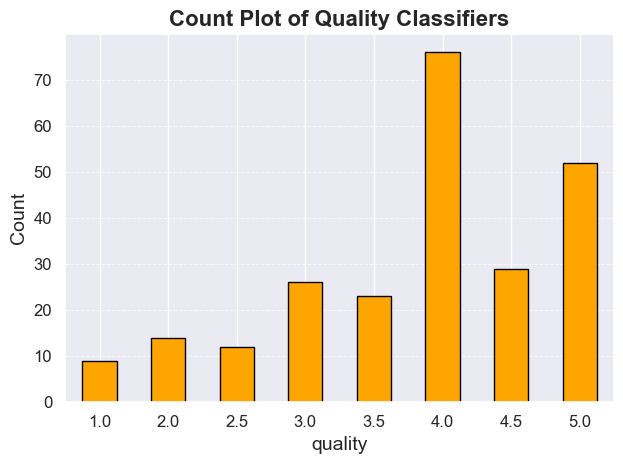

In [17]:
data_orange['Quality (1-5)'].value_counts().sort_index().plot(kind='bar', color='orange', edgecolor='black')
plt.title('Count Plot of Quality Classifiers', fontsize=16, fontweight='bold')
plt.xlabel('quality', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.xticks(rotation=0, fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis='y', linestyle='--', linewidth=0.7, alpha=0.7)
plt.tight_layout()
plt.show()

* The majority of quality ratings fall within the range of 4.0 and 5.0, with 76 and 52 instances respectively .This indicate that a considerable portion of the dataset compires items rated as hight-quality,typically scoring 4.0 or 5.0.  
* Ratings 3.0, 3.5 and 4.5 also have notable occurrence, with 26,23, and 29 instances respectively. This indicate that there is a substantial presece of items with mid-range quality ratings as well.  
* Althought less frequent, lower quality ratings (1.0, 2.0, and 2.5) are present, with 9, 14,and 12 instances respectively. This indicates that there are items within the datasets that might be considered of lower quality based on these ratings. 

In [18]:
data_orange['Softness (1-5)'].value_counts()

Softness (1-5)
3.0    47
4.0    46
5.0    40
2.0    39
1.0    34
2.5    11
3.5     8
1.5     8
4.5     8
Name: count, dtype: int64

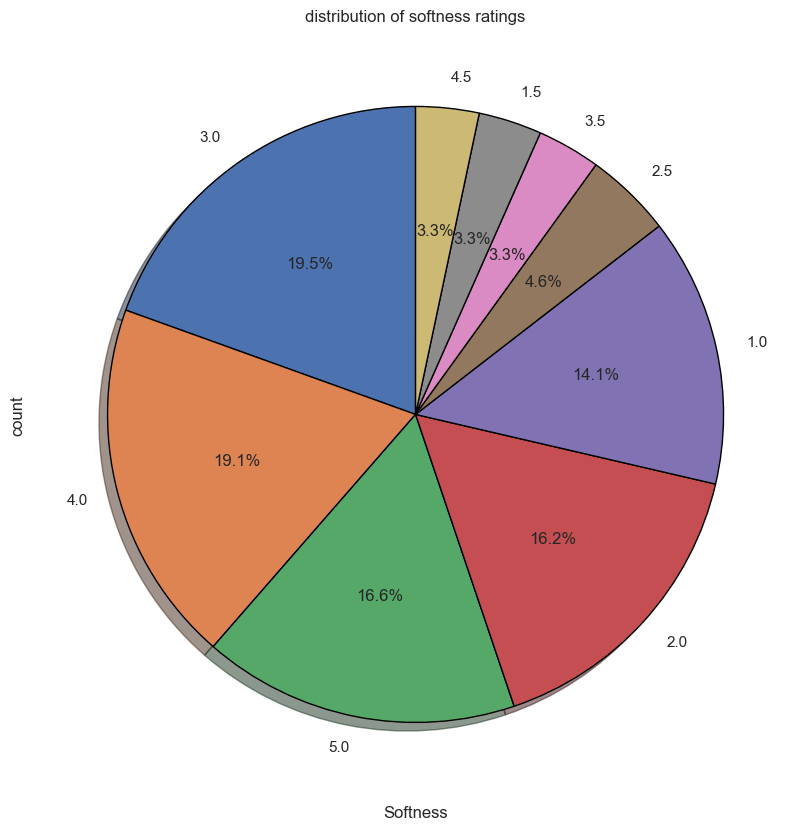

In [40]:
plt.figure(figsize=(12,10))
data_orange['Softness (1-5)'].value_counts().plot.pie(autopct='%1.1f%%', 
    startangle=90, wedgeprops={'edgecolor': 'black'},shadow= True,explode=(0,0,0,0,0,0,0,0,0))
plt.xlabel('Softness')
plt.ylabel('count')
plt.title('distribution of softness ratings')
plt.show()


* Softness ratings across the 1 to 5 scale show notable occurrences for e   ch rating, indicating diverse representation . the most common are 3.0 and 4.0, ,suggesting a prevalence of moderate softness.

In [43]:
data_orange['Ripeness (1-5)'].value_counts()

Ripeness (1-5)
5.0    58
4.0    52
3.0    46
2.0    27
4.5    23
1.0    17
3.5    12
2.5     6
Name: count, dtype: int64

C:\Users\DELL\AppData\Local\Temp\ipykernel_13504\303586706.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Ripeness (1-5)', y='count', data=ripeness , palette='viridis', edgecolor='black' )


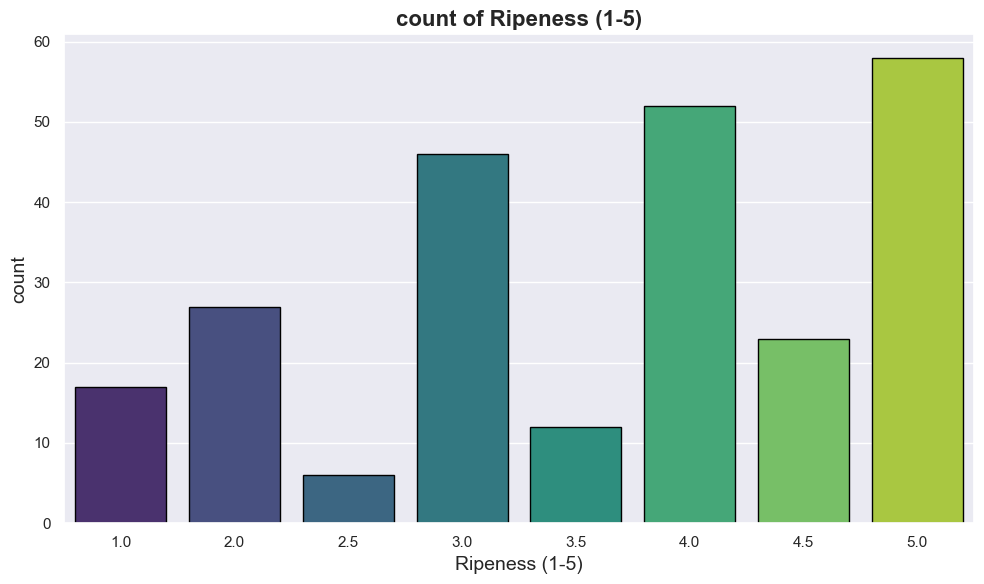

In [63]:
plt.figure(figsize=(10,6))
ripeness=data_orange['Ripeness (1-5)'].value_counts().reset_index()
sns.barplot(x='Ripeness (1-5)', y='count', data=ripeness , palette='viridis', edgecolor='black' )
plt.title('count of Ripeness (1-5)', fontsize=16, fontweight='bold')
plt.xlabel('Ripeness (1-5)',fontsize=14)
plt.ylabel('count',fontsize=14)
plt.tight_layout()
plt.show()

* Ripeness ratings span the entire 1 to 5 scale, with notable occurrences for each rating, suggesting diverse representation. The most common ratings are 3.0, 4.0, and 5.0, with 46, 52, and 58 instances respectively, indicating a tendency for items to be ripe or nearing ripeness. Presence across all ratings indicates variability in ripeness levels, likely influenced by factors like harvesting times or storage conditions. Occurrences at extreme (1.0, 2.0) and intermediate (2.5, 3.5, 4.5) values highlight items with varying ripeness levels in the dataset.

In [11]:
data_orange.describe().T

,count,mean,std,min,25%,50%,75%,max
Size (cm),241.0,7.844813,1.086002,6.0,6.9,7.8,8.7,10.0
Weight (g),241.0,205.128631,56.461012,100.0,155.0,205.0,252.0,300.0
Brix (Sweetness),241.0,10.907884,2.760446,5.5,8.5,11.0,13.4,16.0
pH (Acidity),241.0,3.473900,0.421007,2.8,3.2,3.4,3.8,4.4
Softness (1-5),241.0,3.072614,1.323630,1.0,2.0,3.0,4.0,5.0
HarvestTime (days),241.0,15.344398,5.323852,4.0,11.0,15.0,20.0,25.0
Ripeness (1-5),241.0,3.599585,1.205214,1.0,3.0,4.0,4.5,5.0
Quality (1-5),241.0,3.817427,1.014410,1.0,3.0,4.0,4.5,5.0


* on observe la distribution des defferantes autre varibale variable :

In [65]:
columns_orange=data_orange.copy()
columns_orange.drop(['Quality (1-5)'],axis=1,inplace=True)
columns = list(columns_orange.columns)
columns

['Size (cm)',
 'Weight (g)',
 'Brix (Sweetness)',
 'pH (Acidity)',
 'Softness (1-5)',
 'HarvestTime (days)',
 'Ripeness (1-5)',
 'Color',
 'Variety',
 'Blemishes (Y/N)']

In [66]:
columns_orange.shape

(241, 10)

<Axes: >

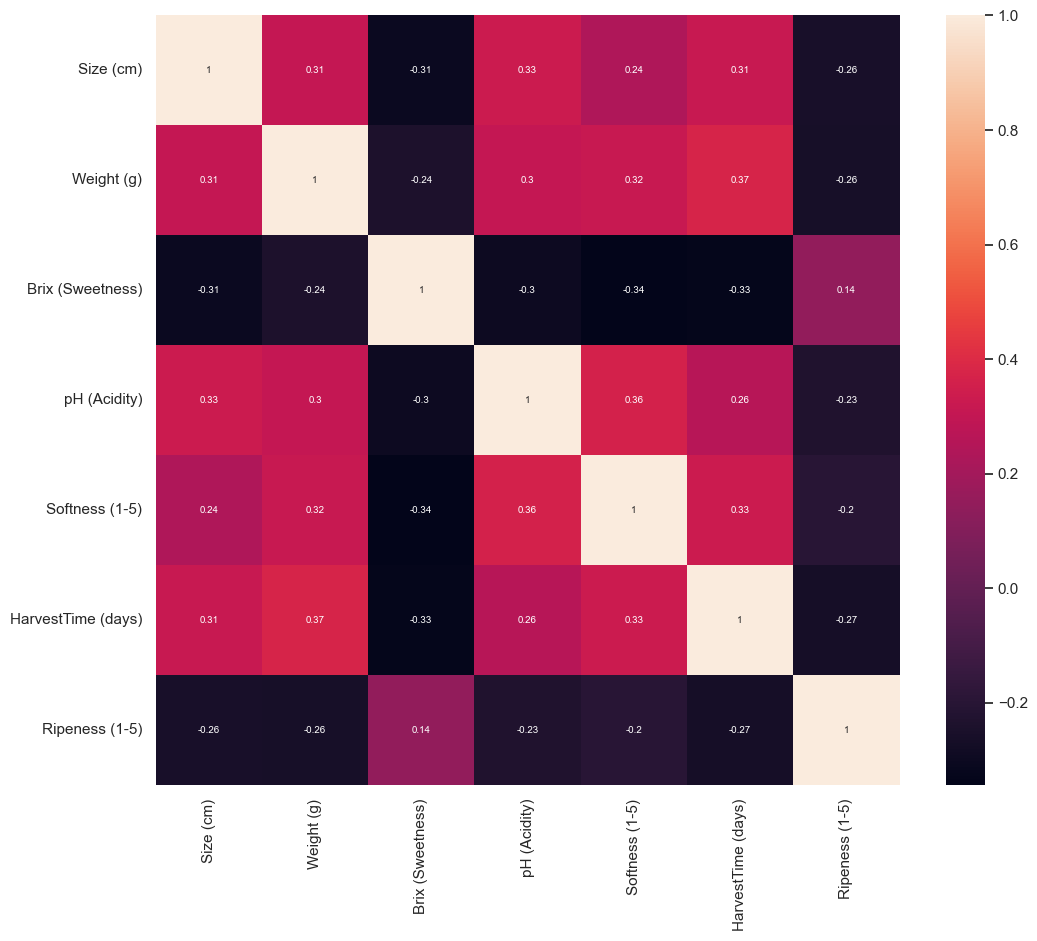

In [68]:
plt.figure(figsize=(12,10))
sns.heatmap(columns_orange.corr(numeric_only=True),annot=True,annot_kws={'fontsize' : 7})